## Exploratory data analysis of the tips data

Required data

1. How many features are there and what are they?
2. Show basic statistics of the fetures - both numerical and categorical.
3. What are the days? (Bar chart)
4. What are the times? (Bar chart)
5. What are the sexes? (Pie - % with 0 decimal place)
6. What are the smokers? (Donut - % with 0 decimal place)
7. What is the min, max, average values of total bills? Are there any outliers?
8. What is the min, max, average values of tips? Are there any outliers?
9. Show the customer with max total bill. What are other features of that customer?
10. Show the customer with max tip. What are other features of that customer?
11. What gender has higher footfalls on weekdays?
12. What gender has higher footfalls on weekends?
13. List top ten tippers.
14. List top five tippers on weekends.
15. Who is the generous tipper? - A smoker or a non-smoker?
16. Who is the generous tipper? - A male or a female?
17. List top five female tippers. How many of them were smokers?
18. List top five male tippers. What did they have - Lunch/Dinner?
19. Create a new column - 'tip%'. It will contain the values of tips w.r.t total bills.
20. Who came with larger party sizes - males or females?
21. Who came with larger party sizes - smokers or non-smokers?
22. What is the maximum tip given by a non-smoker female? 
23. What is the maximum tip given by a smoker male?
24. List top five customers who has highest tip-to-bill ratio.
25. Show distributions of total bill and tips. What conclusion can be drawn from it?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/tips.csv')
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


#### 1. How many features are there and what are they?

In [5]:
features_no = df.shape[1]
print("No of features are:\t",features_no)

features = df.columns
print("The features are:\t",end="")
for i in features:
    print(i,end=", ")


No of features are:	 7
The features are:	total_bill, tip, sex, smoker, day, time, size, 

#### 2. Show basic statistics of the fetures - both numerical and categorical.

In [6]:
print("\nNumerical Data\n")
print(df.describe())
print("\nCategorical Data\n")
print(df.describe(include='object'))


Numerical Data

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Categorical Data

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


#### 3. What are the days? (Bar chart)

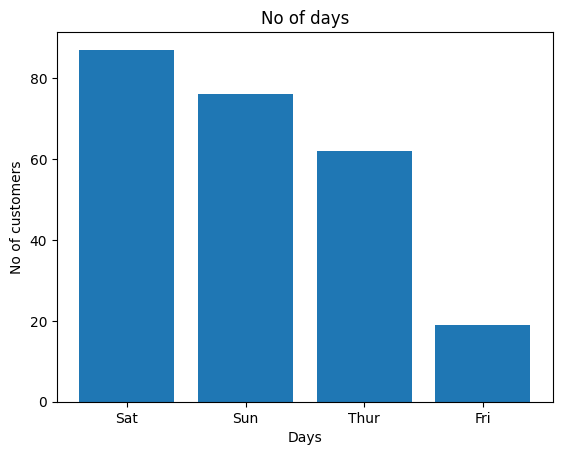

In [7]:
plt.figure()
plt.title("No of days")
plt.xlabel("Days")
plt.ylabel("No of customers")
plt.bar(df['day'].value_counts().index,df['day'].value_counts().values)
plt.show()

#### 4. What are the times? (Bar chart)

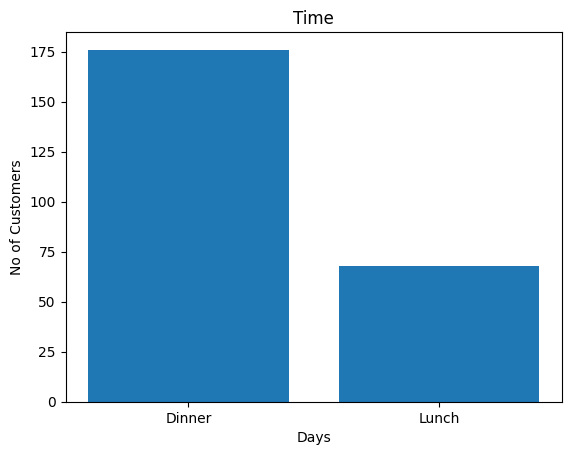

In [8]:

plt.figure()
plt.title("Time")
plt.xlabel("Days")
plt.ylabel("No of Customers")
plt.bar(df['time'].value_counts().index,df['time'].value_counts().values)
plt.show()

#### 5. What are the sexes? (Pie - % with 0 decimal place)

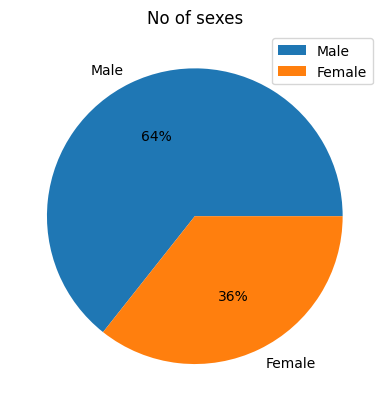

In [9]:
plt.figure()
plt.title("No of sexes")
plt.pie(df['sex'].value_counts().values,labels=df['sex'].value_counts().index, autopct='%1.0f%%')
plt.legend(loc='best')
plt.show()

#### 6. What are the smokers? (Donut - % with 0 decimal place)

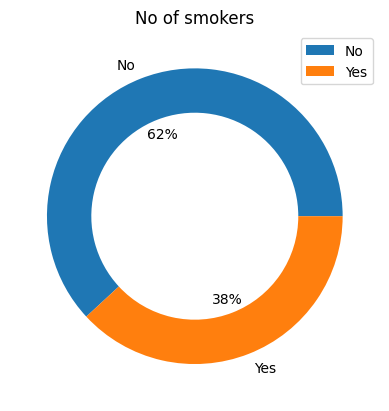

In [10]:
plt.figure()
plt.title("No of smokers")
plt.pie(df['smoker'].value_counts().values,labels=df['smoker'].value_counts().index, autopct='%1.0f%%',wedgeprops=dict(width=0.3))
plt.legend(loc='best')
plt.show()

#### 7. What is the min, max, average values of total bills? Are there any outliers?

In [11]:
total_bill= df['total_bill'].sort_values()
print("Max total bill is:\t",total_bill.iloc[-1])
print("Min total bill is:\t",total_bill.iloc[0])
print("Mean total bill is:\t",total_bill.mean())


Max total bill is:	 50.81
Min total bill is:	 3.07
Mean total bill is:	 19.785942622950817


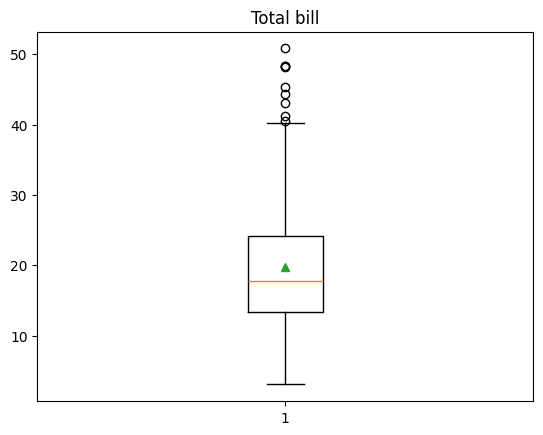

In [12]:
plt.figure()
plt.title("Total bill")
plt.boxplot(df['total_bill'],showmeans=True)
plt.show()

In [13]:
Q1=total_bill.quantile(0.25)
Q3=total_bill.quantile(0.75)
IQR=Q3-Q1
total_bill_outliers = total_bill[(total_bill>Q3+1.5*IQR)]
print("total outliers are :",total_bill_outliers.shape[0])
print("\nOutliers are:")
print(total_bill_outliers)

total outliers are : 9

Outliers are:
184    40.55
142    41.19
197    43.11
102    44.30
182    45.35
156    48.17
59     48.27
212    48.33
170    50.81
Name: total_bill, dtype: float64


#### 8. What is the min, max, average values of tips? Are there any outliers?

In [14]:
tips= df['tip'].sort_values()
print("Max total bill is:\t",tips.iloc[-1])
print("Min total bill is:\t",tips.iloc[0])
print("Mean total bill is:\t",tips.mean())


Max total bill is:	 10.0
Min total bill is:	 1.0
Mean total bill is:	 2.99827868852459


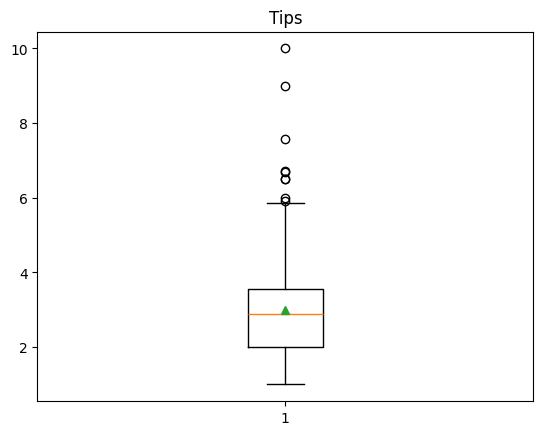

In [15]:
plt.figure()
plt.title("Tips")
plt.boxplot(df['tip'],showmeans=True)
plt.show()

In [16]:
Q1=tips.quantile(0.25)
Q3=tips.quantile(0.75)
IQR=Q3-Q1
tips_outliers = tips[(tips>Q3+1.5*IQR)]
print("total outliers are :",tips_outliers.shape[0])
print("\nOutliers are:")
print(tips_outliers)

total outliers are : 9

Outliers are:
239     5.92
47      6.00
183     6.50
214     6.50
141     6.70
59      6.73
23      7.58
212     9.00
170    10.00
Name: tip, dtype: float64


#### 9. Show the customer with max total bill. What are other features of that customer?

In [17]:
print("Max bill customer details:\n",df.iloc[total_bill.index[-1]])

Max bill customer details:
 total_bill     50.81
tip             10.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object


#### 10. Show the customer with max tip. What are other features of that customer?

In [18]:
print("Max tip customer details:\n",df.iloc[tips.index[-1]])

Max tip customer details:
 total_bill     50.81
tip             10.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object


#### 11. What gender has higher footfalls on weekdays?

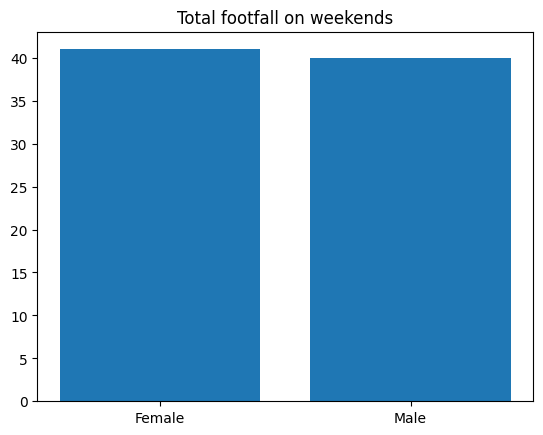

In [19]:
weekdays_data = df[ (df['day']!='Sat') & (df['day']!='Sun')]
#print(weekdays_data)

plt.figure()
plt.title("Total footfall on weekends")
plt.bar(weekdays_data['sex'].value_counts().index,weekdays_data['sex'].value_counts().values)
plt.show()



In [20]:
#print(weekdays_data)
max_gender = weekdays_data['sex'].mode()[0]
print("Most footfall in weekends are for :",max_gender)
print(f"No of {max_gender} in are {weekdays_data[weekdays_data['sex']==max_gender].shape[0]}")


Most footfall in weekends are for : Female
No of Female in are 41


#### 12. What gender has higher footfalls on weekends?

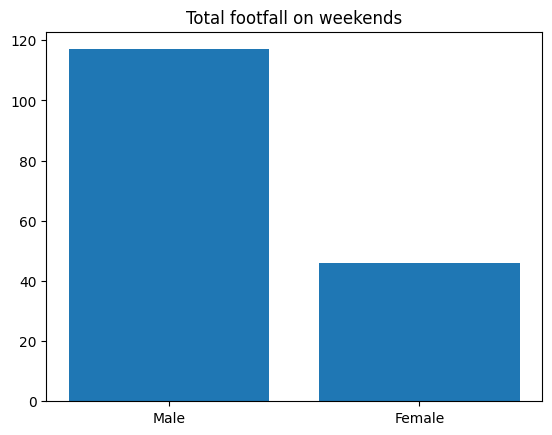

In [21]:
weekends_data = df[(df['day']=='Sat') | (df['day']=='Sun')]
plt.figure()
plt.title("Total footfall on weekends")
plt.bar(weekends_data['sex'].value_counts().index,weekends_data['sex'].value_counts().values)
plt.show()


In [22]:
#print(weekends_data)
max_gender = weekends_data['sex'].mode()[0]
print("Most footfall in weekends are for :",max_gender)
print(f"No of {max_gender} in are {weekends_data[weekends_data['sex']==max_gender].shape[0]}")


Most footfall in weekends are for : Male
No of Male in are 117


#### 13. List top ten tippers.

In [23]:
tips = tips.sort_values(ascending=False)
tips.head(10)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
214     6.50
183     6.50
47      6.00
239     5.92
88      5.85
Name: tip, dtype: float64

#### 14. List top five tippers on weekends.

In [24]:
df['tip'].sort_values(ascending=False)[(df['day']=='Sun')| (df['day']=='Sat')].head(5)

170    10.00
212     9.00
23      7.58
59      6.73
214     6.50
Name: tip, dtype: float64

#### 15. Who is the generous tipper? - A smoker or a non-smoker?

In [25]:
smoker=df.iloc[tips.index[-1]]['smoker']
print("Does the most generous tipper smokes :",smoker)

Does the most generous tipper smokes : Yes


#### 16. Who is the generous tipper? - A male or a female?

In [26]:
print("Gender of the most generous tipper :",df.iloc[tips.index[-1]]['sex'])

Gender of the most generous tipper : Female


#### 17. List top five female tippers. How many of them were smokers?

In [27]:
female_tippers = df[df['sex']=='Female'].sort_values('tip',ascending=False)
#print(female_tippers)
df15=female_tippers[['tip','smoker']].head(5)
print(df15)

print("No of female smokers in top 5 tippers are :", df15[df15['smoker']=='Yes'].shape[0])

      tip smoker
214  6.50    Yes
52   5.20     No
85   5.17     No
155  5.14     No
11   5.00     No
No of female smokers in top 5 tippers are : 1


#### 18. List top five male tippers. What did they have - Lunch/Dinner?

In [28]:
male_tippers = female_tippers = df[df['sex']=='Male'].sort_values('tip',ascending=False)
print(male_tippers[['tip','time']].head(5))

       tip    time
170  10.00  Dinner
212   9.00  Dinner
23    7.58  Dinner
59    6.73  Dinner
141   6.70   Lunch


#### 19. Create a new column - 'tip%'. It will contain the values of tips w.r.t total bills.

In [29]:
df['tip_percentage'] = (((df['tip'])/df['total_bill'])*100).round(2)
print(df)

     total_bill   tip     sex smoker   day    time  size  tip_percentage
0         16.99  1.01  Female     No   Sun  Dinner     2            5.94
1         10.34  1.66    Male     No   Sun  Dinner     3           16.05
2         21.01  3.50    Male     No   Sun  Dinner     3           16.66
3         23.68  3.31    Male     No   Sun  Dinner     2           13.98
4         24.59  3.61  Female     No   Sun  Dinner     4           14.68
..          ...   ...     ...    ...   ...     ...   ...             ...
239       29.03  5.92    Male     No   Sat  Dinner     3           20.39
240       27.18  2.00  Female    Yes   Sat  Dinner     2            7.36
241       22.67  2.00    Male    Yes   Sat  Dinner     2            8.82
242       17.82  1.75    Male     No   Sat  Dinner     2            9.82
243       18.78  3.00  Female     No  Thur  Dinner     2           15.97

[244 rows x 8 columns]


#### 20. Who came with larger party sizes - males or females?

In [30]:
df['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

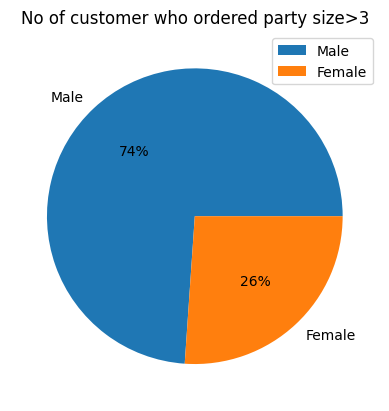

In [31]:
large_party_sizes_sex=df['sex'][df['size']>3]
plt.figure()
plt.title("No of customer who ordered party size>3")
plt.pie(large_party_sizes_sex.value_counts().values,labels=large_party_sizes_sex.value_counts().index,autopct='%1.0f%%')
plt.legend(loc="best")
plt.show()


#### 20. Who came with larger party sizes - males or females?

In [32]:
print("The gender that ordered the most large party size are :")
large_party_sizes_sex=large_party_sizes_sex.value_counts().sort_values()
print(f"{large_party_sizes_sex.index[-1]} who ordered {large_party_sizes_sex.values[-1]} orders")

The gender that ordered the most large party size are :
Male who ordered 34 orders


#### 21. Who came with larger party sizes - smokers or non-smokers?

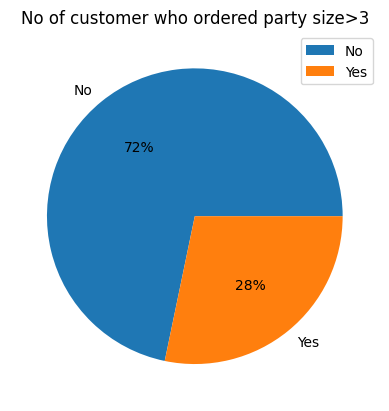

In [39]:
large_party_sizes_smoker=df['smoker'][df['size']>3]
plt.figure()
plt.title("No of customer who ordered party size>3")
plt.pie(large_party_sizes_smoker.value_counts().values,labels=large_party_sizes_smoker.value_counts().index,autopct='%1.0f%%')
plt.legend(loc="best")
plt.show()
print()


#### 25. Show distributions of total bill and tips. What conclusion can be drawn from it?

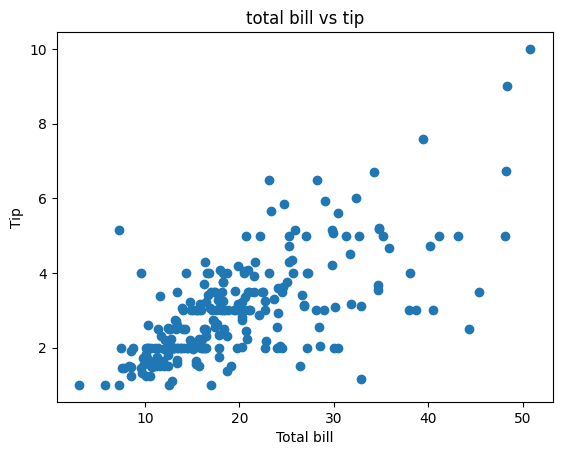

In [34]:
plt.figure()
plt.title("total bill vs tip")
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.show()

In [35]:
print("Correlation between total bill and tip is:\t",df['total_bill'].corr(df['tip']))

Correlation between total bill and tip is:	 0.6757341092113641
